**Goal**: Study of socio-economic factors is foundational to understanding and shaping the future of societies and hence of extreme interest to various government and non-government institutions. While GDP is one of the most popular measure used on popular vernacular, it is not the only measure of the growth and the state of an economy.

This case study aims to deep dive into one such dataset that contains various socio-economic attributes for countries around the world.

**Objective**: To identify if there exist various cluster of countries that are more similar to each other in terms of certain socio-economic factors.

**Data Dictionary**:
- country: name of the country
- child_mort: death of children under 5 years of age per 100 live births
- exports: exports in % age of the GDP per capita
- health: the total spent on health given as % of GDP
- imports: the value of imports given as % of GDP per capita
- income: the net income per person
- inflation: inflation rate
- life_expec: average life expectancy in years
- total_fer: the fertility rate - average children per woman in the country
- gdpp: GDP per capita

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv('./data/Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
(data.isnull().sum() /data.shape[0]) * 100

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [6]:
data[data.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


### **Checking the distribution and the outliers for each column in the data

child_mort
Skew: 1.4507735387555047


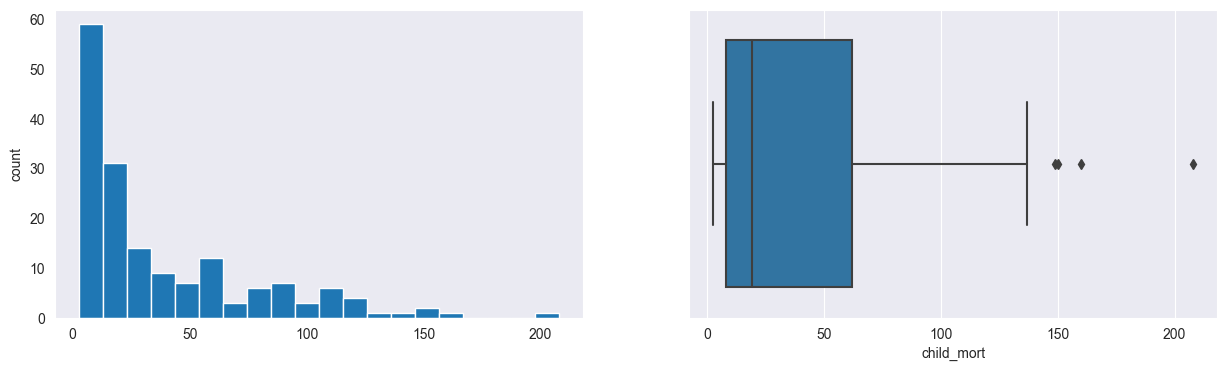

exports
Skew: 2.4458240051613496


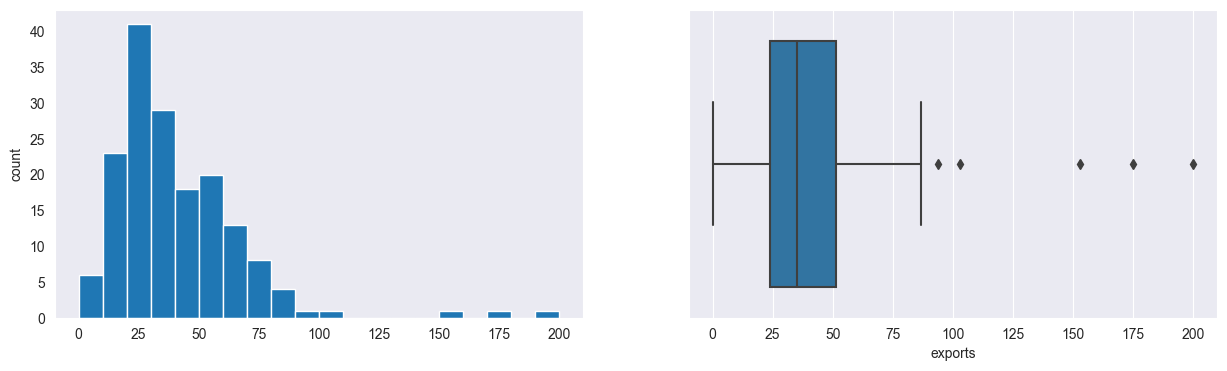

health
Skew: 0.7057460547100981


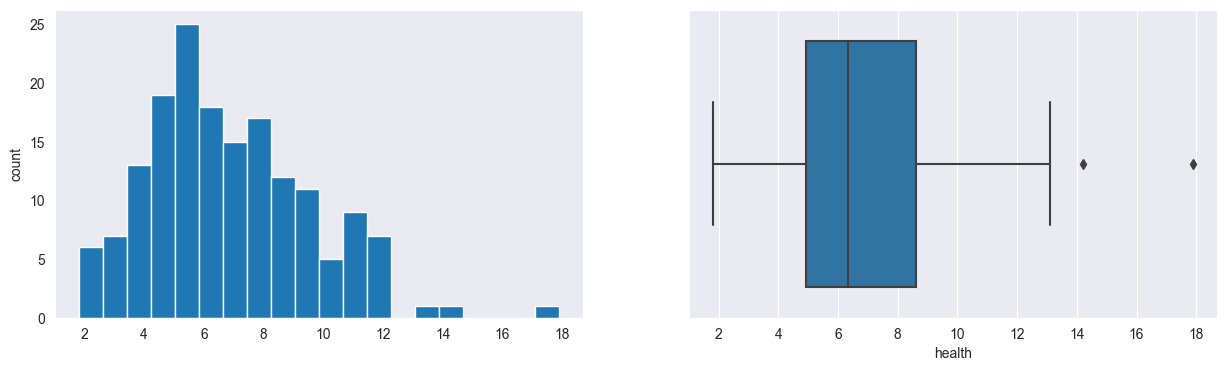

imports
Skew: 1.90527571988626


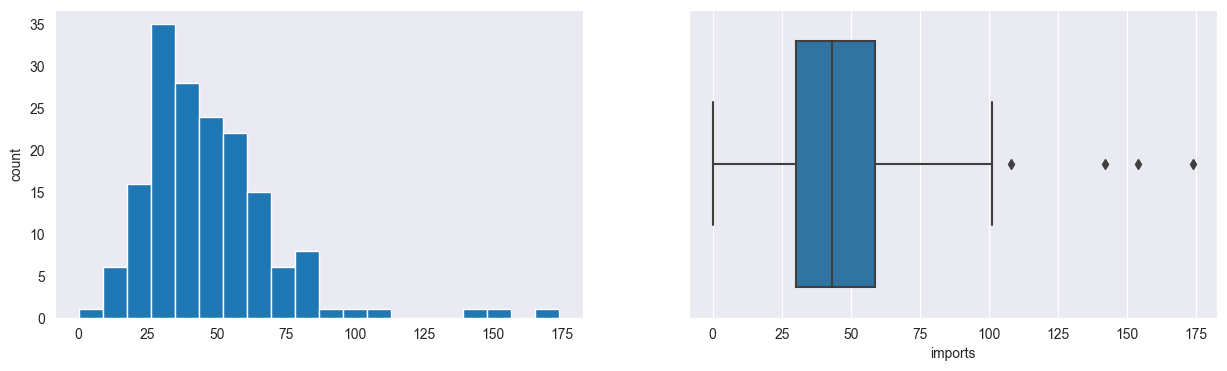

income
Skew: 2.231479607767527


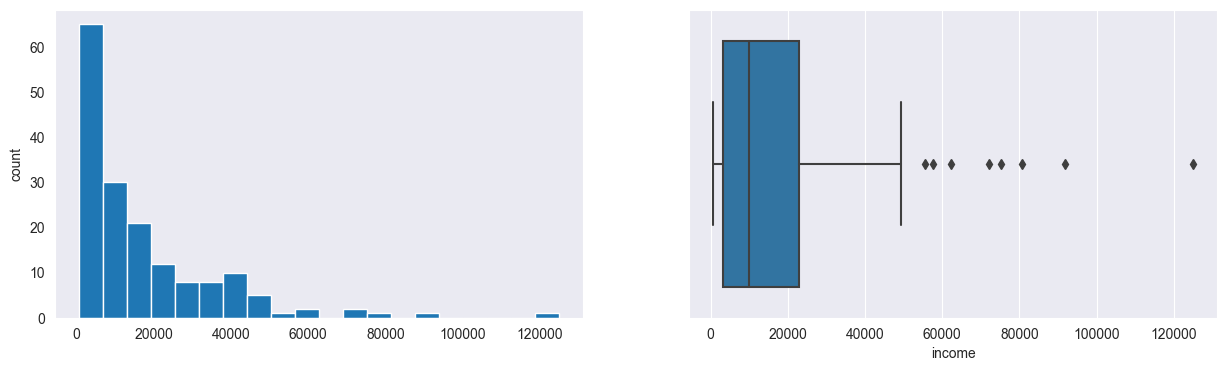

inflation
Skew: 5.154049359697971


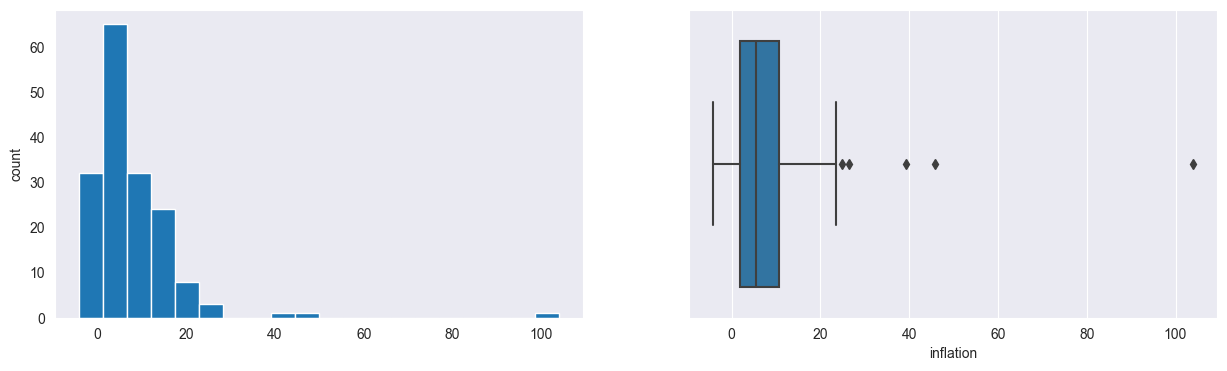

life_expec
Skew: -0.9709955819991258


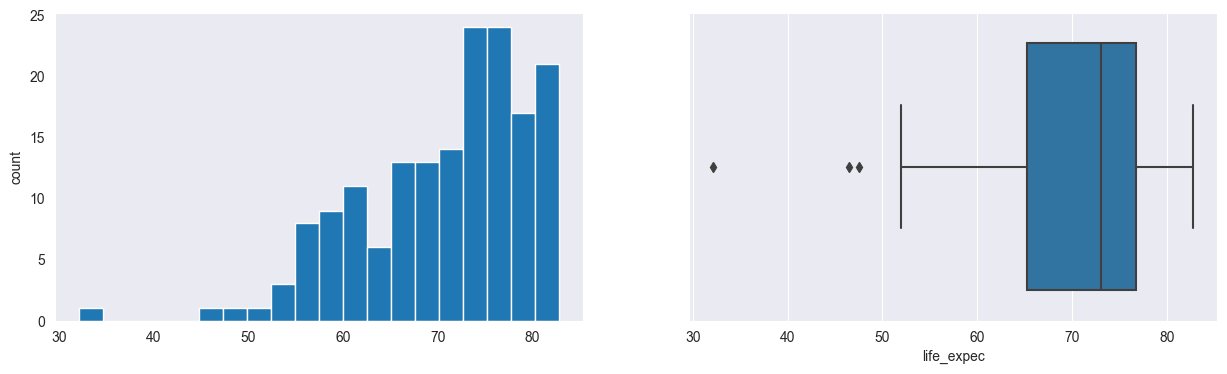

total_fer
Skew: 0.9670916808050207


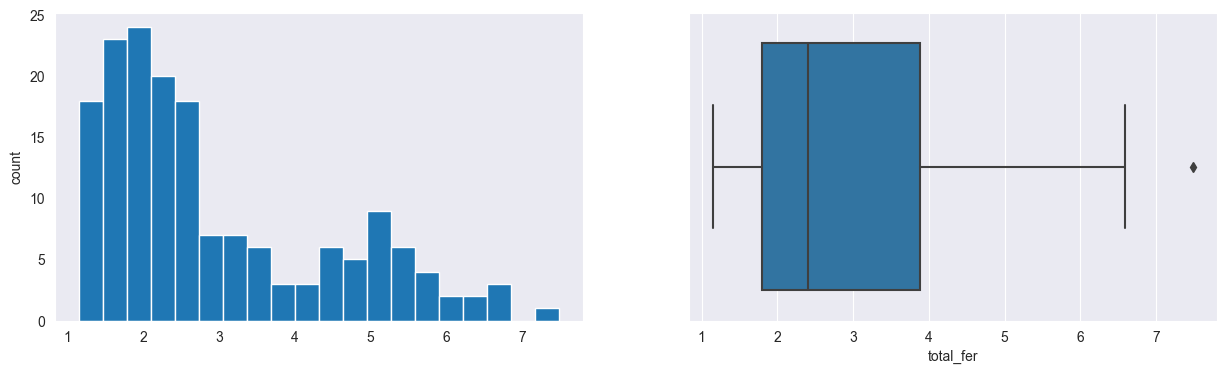

gdpp
Skew: 2.2180514519497163


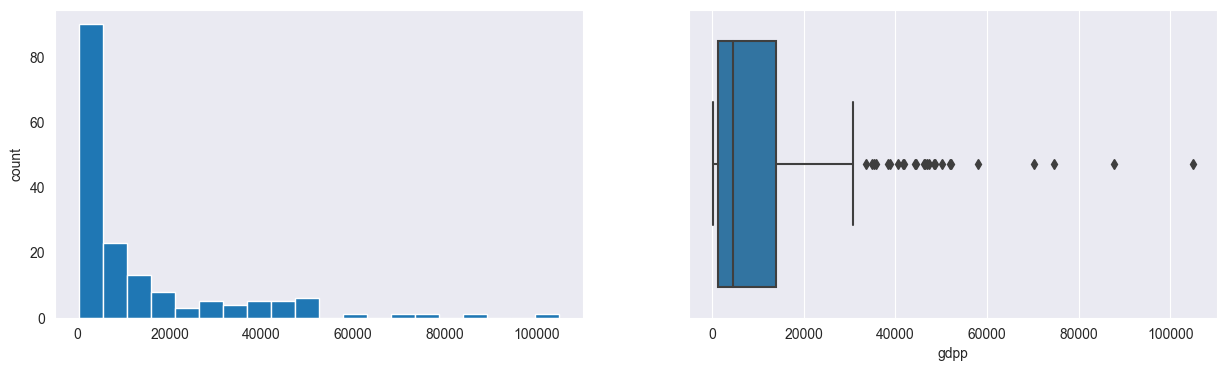

In [8]:
for col in data.columns[1:]:
    print(col)
    print('Skew:', data[col].skew())
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(bins=20, grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

### **checking for correlation**

C:\Users\lorac\AppData\Local\Temp\ipykernel_13488\834430384.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=data.corr(), annot=True)


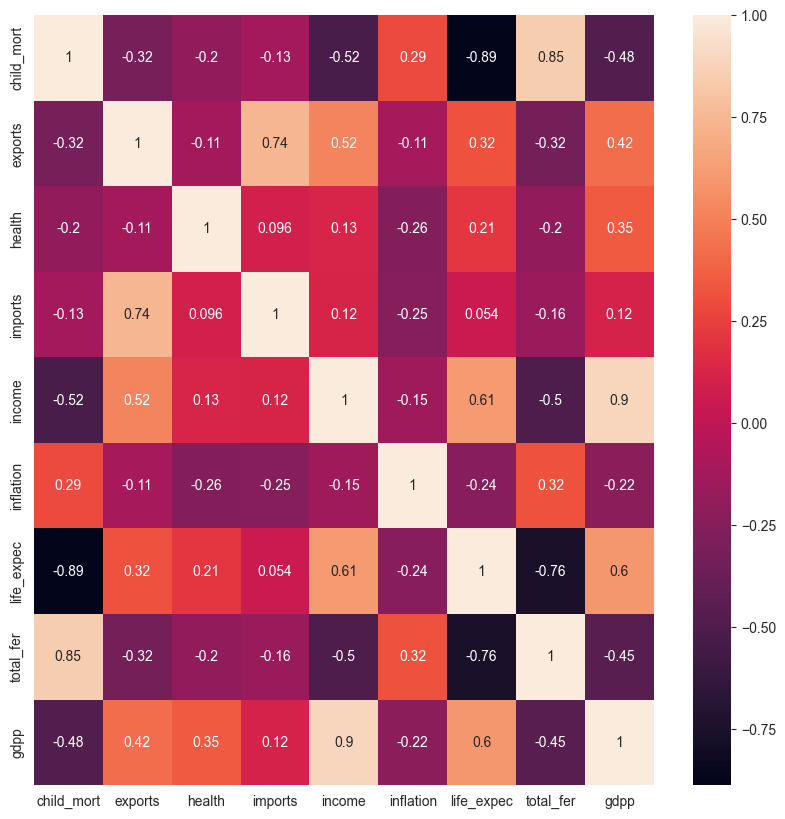

In [9]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=data.corr(), annot=True)
plt.show()

### **scaling the data**
- Clustering algorithms are distance-based algorithms and all distance-based algorithms are affected by the scale of the variables. Therefore, we will scale the data before applying clustering algorithms.
- We will drop the variables "country" and "gdpp" before scaling the data as we would not use these two variables for clustering the countries.

In [10]:
data.drop(['country', 'gdpp'], axis=1, inplace=True)

In [12]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946


In [13]:
data_scaled_copy = data_scaled.copy()

C:\Users\lorac\PycharmProjects\Case Studies\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lorac\PycharmProjects\Case Studies\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lorac\PycharmProjects\Case Studies\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lorac\PycharmProjects\Case Studies\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

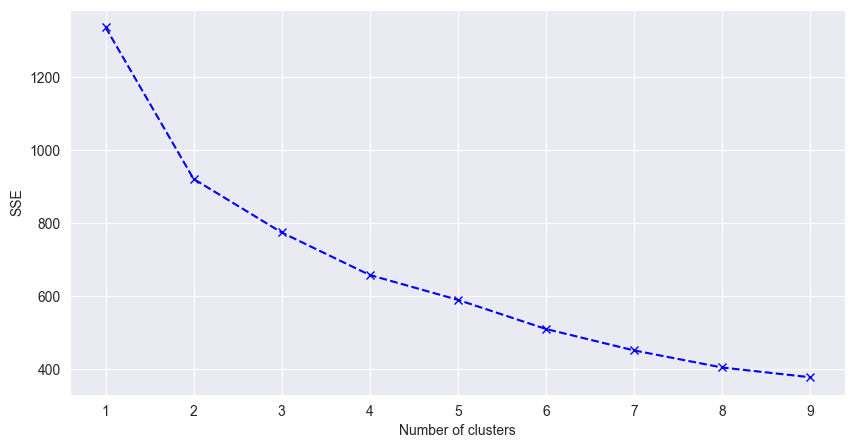

In [14]:
sse = {}

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data_scaled)
    sse[k] = kmeans.inertia_

plt.figure(figsize=(10, 5))
plt.plot(list(sse.keys()), list(sse.values()), 'bx--')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

C:\Users\lorac\PycharmProjects\Case Studies\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lorac\PycharmProjects\Case Studies\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lorac\PycharmProjects\Case Studies\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lorac\PycharmProjects\Case Studies\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

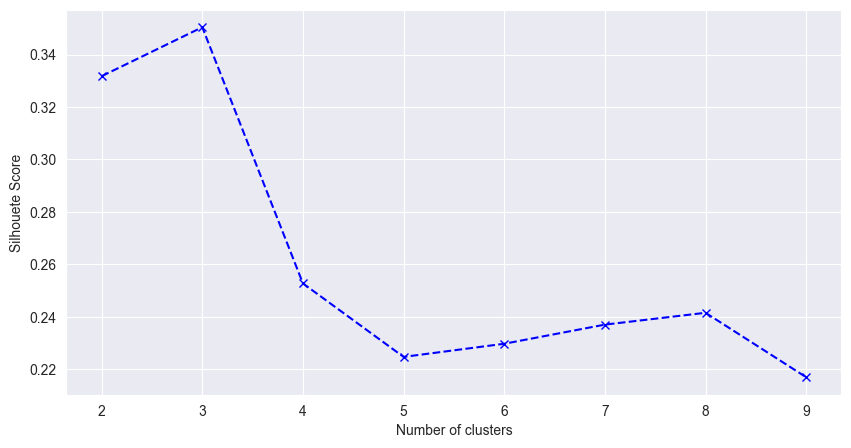

In [15]:
sc = {}

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_scaled)
    labels = kmeans.predict(data_scaled)
    sc[k] = silhouette_score(data_scaled, labels)

# Elbow Plot
plt.figure(figsize=(10, 5))
plt.plot(list(sc.keys()), list(sc.values()), 'bx--')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouete Score')
plt.show()

In [16]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(data_scaled)

data_scaled_copy['KMeans_labels'] = kmeans.labels_
data['KMeans_Labels'] = kmeans.predict(data_scaled)

C:\Users\lorac\PycharmProjects\Case Studies\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
data['KMeans_Labels'].value_counts()

0    112
1     52
2      3
Name: KMeans_Labels, dtype: int64

In [19]:
#Calculating the mean and median of the original data for each label
mean = data.groupby('KMeans_Labels').mean()
median = data.groupby('KMeans_Labels').median()

df_Kmeans = pd.concat([mean, median], axis=0)

df_Kmeans.index = ['group0_mean', 'group1_mean', 'group2_mean', 'group0_median', 'group1_median', 'group2_median']
df_Kmeans.T

,group0_mean,group1_mean,group2_mean,group0_median,group1_median,group2_median
child_mort,15.703571,88.844231,4.133333,12.450,85.65,2.80
exports,43.487500,28.203827,176.000000,39.600,23.30,175.00
health,7.069464,6.270385,6.793333,6.790,5.48,7.77
imports,46.143750,42.164729,156.666667,44.900,39.75,154.00
income,22069.285714,3832.750000,64033.333333,16250.000,1960.00,72100.00
inflation,6.042920,11.833750,2.468000,3.810,8.95,3.62
life_expec,75.215179,59.892308,81.433333,75.800,60.45,81.30
total_fer,2.119821,4.822115,1.380000,1.995,5.00,1.36


child_mort


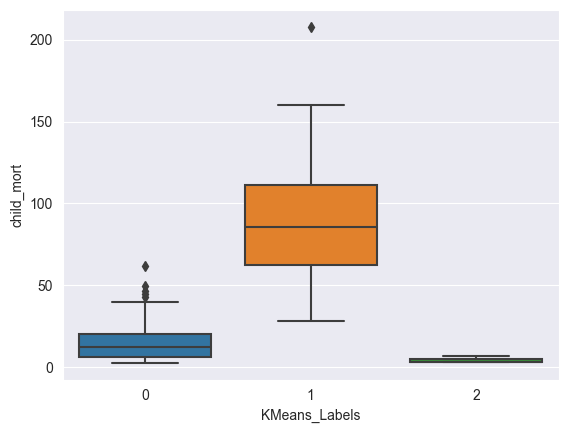

exports


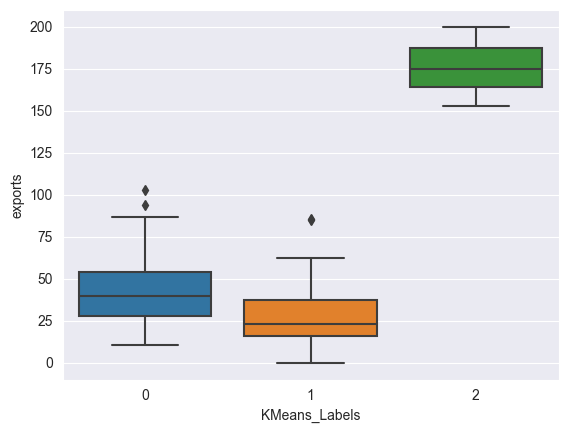

health


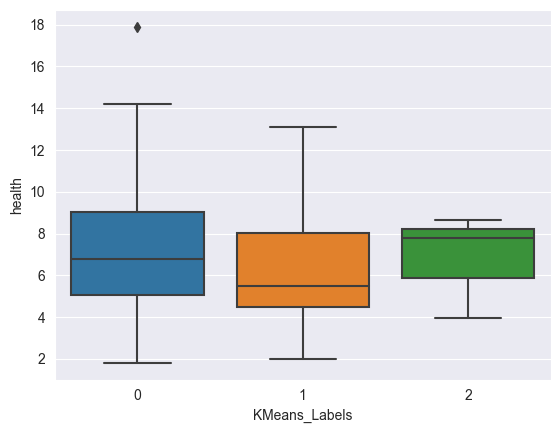

imports


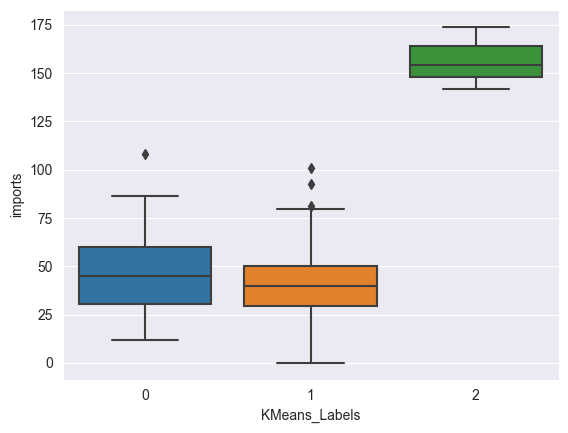

income


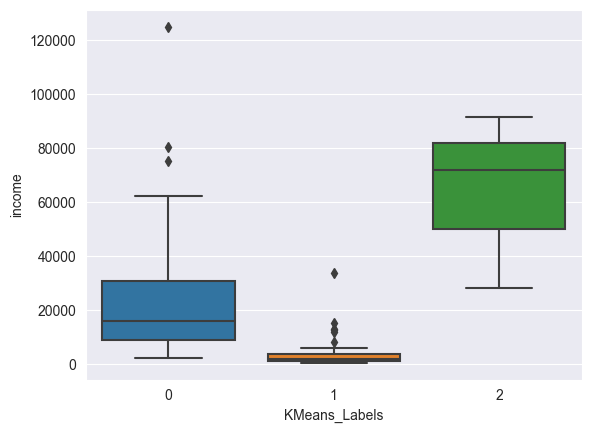

inflation


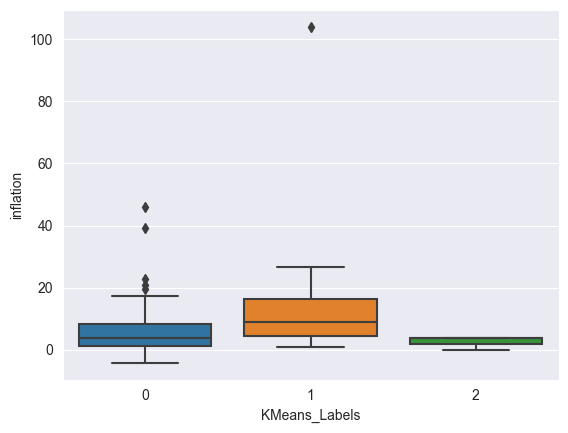

life_expect


ValueError: Could not interpret input 'life_expect'

In [20]:
cols_visualize = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expect', 'total_fer', 'gdpp']

for col in cols_visualize:
    print(col)
    sns.boxplot(data=data, x='KMeans_Labels', y=col)
    plt.show()

### **K-Medoids Clustering**

In [22]:
!pip install scikit-learn-extra

     -------------------------------------- 346.2/346.2 kB 7.1 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
from sklearn_extra.cluster import KMedoids

In [25]:
kmedoids = KMedoids(n_clusters=3, random_state=1).fit(data_scaled)
data_scaled_copy['KMedoids_Labels'] = kmedoids.predict(data_scaled)
data['KMedoids_Labels'] = kmedoids.predict(data_scaled)

In [26]:
data.KMeans_Labels.value_counts()

0    112
1     52
2      3
Name: KMeans_Labels, dtype: int64

In [28]:
original_features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer']

mean = data.groupby('KMedoids_Labels').mean()
median = data.groupby('KMedoids_Labels').median()

df_Kmedoids = pd.concat([mean, median], axis=0)
df_Kmedoids.index = ['group0_mean', 'group1_mean', 'group1_mean', 'group0_median', 'group1_median', 'group2_median']
df_Kmedoids[original_features].T

,group0_mean,group1_mean,group1_mean,group0_median,group1_median,group2_median
child_mort,7.085294,17.853333,82.951724,4.700,15.70,79.600
exports,36.938235,52.989333,28.191362,31.600,48.30,23.800
health,9.413235,6.202133,6.086379,9.585,6.00,5.275
imports,33.452941,57.694667,40.795964,30.750,55.10,36.800
income,38094.705882,17592.800000,4284.189655,36550.000,13500.00,2145.000
inflation,4.020676,5.511573,12.922328,1.825,3.82,9.225
life_expec,79.614706,73.870667,60.958621,80.200,74.10,60.800
total_fer,1.842353,2.179600,4.589655,1.875,2.13,4.875
